In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


# Excercise 1 (1 Point)

- Import the csv files
- Clean up the data. Try removing the least amount of usable information. 
- The columns you will work with are: product, sub_product, issue, company, state, submitted_via, timely_response and consumer_disputed. 


In [2]:
df = pd.read_csv('bank_account_or_service_complaints.csv')
df = df[['product', 'sub_product', 'issue', 'company', 'state', 'submitted_via', 'timely_response' , 'consumer_disputed']]
df.dropna(axis=0, inplace=True)
df

,product,sub_product,issue,company,state,submitted_via,timely_response,consumer_disputed
0,Bank account or service,Checking account,Using a debit or ATM card,Wells Fargo & Company,CA,Web,True,False
1,Bank account or service,Checking account,"Account opening, closing, or management",Santander Bank US,NY,Fax,True,False
2,Bank account or service,Checking account,Deposits and withdrawals,Wells Fargo & Company,GA,Web,True,False
3,Bank account or service,Checking account,Deposits and withdrawals,Bank of America,TX,Web,True,False
4,Bank account or service,Other bank product/service,Deposits and withdrawals,Wells Fargo & Company,CA,Web,True,False
...,...,...,...,...,...,...,...,...
84795,Bank account or service,Checking account,"Account opening, closing, or management",Bank of America,FL,Web,True,True
84796,Bank account or service,Other bank product/service,Problems caused by my funds being low,Union Bank,WA,Web,True,True
84801,Bank account or service,Other bank product/service,"Account opening, closing, or management","Navient Solutions, LLC.",CA,Referral,True,False
84802,Bank account or service,Checking account,Deposits and withdrawals,JPMorgan Chase & Co.,NY,Referral,True,True


#  Excercise 2 (2 Points)
- Now you must keep the 5 companies with the most most complains
- and create a new dataframe to further analyze them 


In [3]:
nc = df.groupby('company', as_index=False)['issue'].count().sort_values(by = 'issue', ascending=False)
nc = list(nc[:5]['company'])
df_top = df[df['company'].isin(nc)].reset_index(drop=True)
df_top

,product,sub_product,issue,company,state,submitted_via,timely_response,consumer_disputed
0,Bank account or service,Checking account,Using a debit or ATM card,Wells Fargo & Company,CA,Web,True,False
1,Bank account or service,Checking account,Deposits and withdrawals,Wells Fargo & Company,GA,Web,True,False
2,Bank account or service,Checking account,Deposits and withdrawals,Bank of America,TX,Web,True,False
3,Bank account or service,Other bank product/service,Deposits and withdrawals,Wells Fargo & Company,CA,Web,True,False
4,Bank account or service,Checking account,Deposits and withdrawals,JPMorgan Chase & Co.,NJ,Postal mail,True,False
...,...,...,...,...,...,...,...,...
41605,Bank account or service,Other bank product/service,"Account opening, closing, or management",Wells Fargo & Company,NJ,Web,False,True
41606,Bank account or service,Checking account,Deposits and withdrawals,JPMorgan Chase & Co.,MI,Referral,True,True
41607,Bank account or service,Checking account,"Account opening, closing, or management",Bank of America,FL,Web,True,True
41608,Bank account or service,Checking account,Deposits and withdrawals,JPMorgan Chase & Co.,NY,Referral,True,True


#  Excercise 3  (2 Points)

- Plot the number of complaints for top companies and the submission type. 


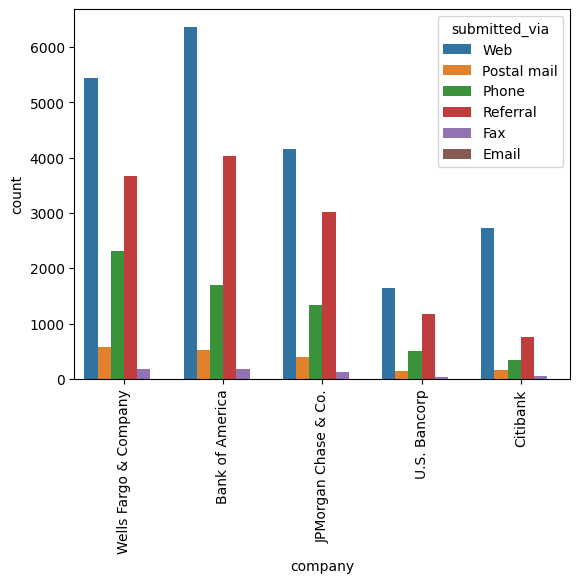

In [4]:
sns.countplot(data=df_top, x = 'company', hue='submitted_via')
plt.xticks(rotation = 90)
plt.show()

# Excercise 4 (3 Points)

- Analyze issues that banks are failing to response in time to the clients,
- Identify and assess the top three critical issues that are not being resolved in a timely manner.
- We are expecting a dataframe that contains the company,  issues, the percentage of issues 
- not responded in a timely manner and the percentage of clients disputes.  
- Lastly, make a plot to find out the bank that has the highest percentage of untimely responses. 


In [5]:
t3 = df_top[df_top['timely_response'] == False]
t3_issue = list(t3.groupby('issue', as_index=False).count().sort_values(by = 'product', ascending=False)[:3]['issue'])
df_tis = df_top[df_top['issue'].isin(t3_issue)]
#n_i, n_d = len(df_tis['timely_response']== False), len(df_tis['consumer_disputed']== True)
df_tis.replace({True: 1, False: 0}, inplace=True)
df_r = df_tis.groupby(['company', 'issue'], as_index=False).agg(
    total = ('product', 'size'),
    timely_sum=('timely_response', 'sum'),
    dis_sum = ('consumer_disputed', 'sum')).assign(
    tim_pct = lambda x: round((x.total - x.timely_sum) / x.total * 100, 2),
    res_pct = lambda x: round((x.dis_sum) / x.total , 2) * 100
)
df_r

C:\Users\moise\AppData\Local\Temp\ipykernel_36808\1214639246.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_tis.replace({True: 1, False: 0}, inplace=True)
C:\Users\moise\AppData\Local\Temp\ipykernel_36808\1214639246.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tis.replace({True: 1, False: 0}, inplace=True)


,company,issue,total,timely_sum,dis_sum,tim_pct,res_pct
0,Bank of America,"Account opening, closing, or management",5375,5318,1012,1.06,19.0
1,Bank of America,Deposits and withdrawals,3464,3426,574,1.10,17.0
2,Bank of America,Problems caused by my funds being low,1831,1825,210,0.33,11.0
3,Citibank,"Account opening, closing, or management",2703,2693,411,0.37,15.0
4,Citibank,Deposits and withdrawals,670,664,155,0.90,23.0
5,Citibank,Problems caused by my funds being low,134,134,30,0.00,22.0
6,JPMorgan Chase & Co.,"Account opening, closing, or management",3565,3557,894,0.22,25.0
7,JPMorgan Chase & Co.,Deposits and withdrawals,2873,2862,676,0.38,24.0
8,JPMorgan Chase & Co.,Problems caused by my funds being low,974,972,184,0.21,19.0
9,U.S. Bancorp,"Account opening, closing, or management",1497,1495,348,0.13,23.0


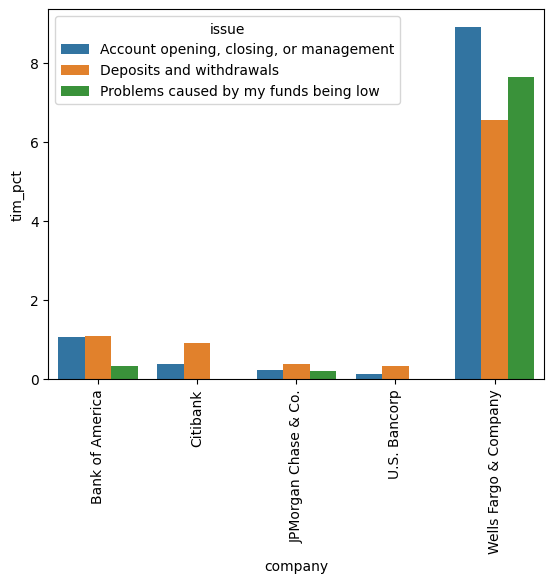

In [6]:
sns.barplot(data= df_r, x= 'company', y = 'tim_pct', hue= 'issue')
plt.xticks(rotation = 90)
plt.show()

# Excercise 5 (2 Points)

- Using the resulting dataframe from Ej1, build a linear ridge regression model that predicts requests that were satisfied in time (timely_response)
- Use the code below based one OneHotEncoder to build X data matrix.
- OneHotEncoder transforms categorical variables into binary variables
- Use 10% for testing and 5-folds CV in the training.
- Consider that the problem is hihgly unbalanced.
- Assess the problem with auc for precision-recall curve 


In [20]:
df_top.replace({False:0, True:1}, inplace=True)

C:\Users\moise\AppData\Local\Temp\ipykernel_36808\3250194286.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_top.replace({False:0, True:1}, inplace=True)


In [35]:
for i in df_top.columns:
    print(i, df_top[i].nunique())
y = df_top[['consumer_disputed']]
x = df_top.drop(columns='consumer_disputed')
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
X_encode = encoder.fit_transform(x)
columnas_nuevas = encoder.get_feature_names_out(input_features=x.columns)


product 1
sub_product 5
issue 5
company 5
state 60
submitted_via 6
timely_response 2
consumer_disputed 2


['sub_product_Cashing a check without an account'
 'sub_product_Checking account' 'sub_product_Other bank product/service'
 'sub_product_Savings account' 'issue_Deposits and withdrawals'
 'issue_Making/receiving payments, sending money'
 'issue_Problems caused by my funds being low'
 'issue_Using a debit or ATM card' 'company_Citibank'
 'company_JPMorgan Chase & Co.' 'company_U.S. Bancorp'
 'company_Wells Fargo & Company' 'state_AK' 'state_AL' 'state_AP'
 'state_AR' 'state_AS' 'state_AZ' 'state_CA' 'state_CO' 'state_CT'
 'state_DC' 'state_DE' 'state_FL' 'state_FM' 'state_GA' 'state_GU'
 'state_HI' 'state_IA' 'state_ID' 'state_IL' 'state_IN' 'state_KS'
 'state_KY' 'state_LA' 'state_MA' 'state_MD' 'state_ME' 'state_MH'
 'state_MI' 'state_MN' 'state_MO' 'state_MP' 'state_MS' 'state_MT'
 'state_NC' 'state_ND' 'state_NE' 'state_NH' 'state_NJ' 'state_NM'
 'state_NV' 'state_NY' 'state_OH' 'state_OK' 'state_OR' 'state_PA'
 'state_PR' 'state_RI' 'state_SC' 'state_SD' 'state_TN' 'state_TX'
 'sta